In [17]:
from main import *

import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.spatial import distance_matrix

sns.set_style("ticks", {"axes.linewidth":0.5})
smallfs = 8
bigfs = 10
plt.rc('font', size=smallfs)          # Ticklabels, legend labels, etc.
plt.rc('axes', labelsize=bigfs)    # Axis labels
plt.rc('axes', titlesize=bigfs)    # Titles

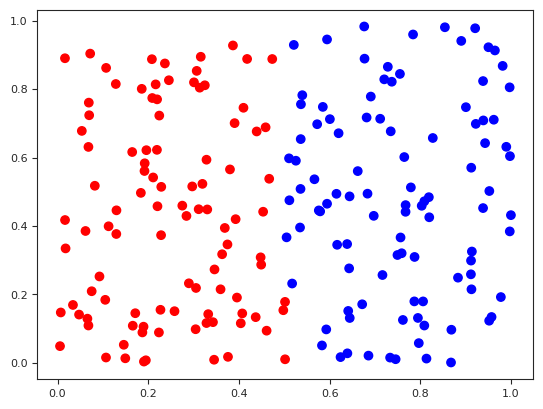

45.01025929778628 44.22512872198439
4.021192187282681 3.99
74.2359736756676 44.22512872198439
10.826304880716705 3.99


Text(0.5, 0, 'perceived distances')

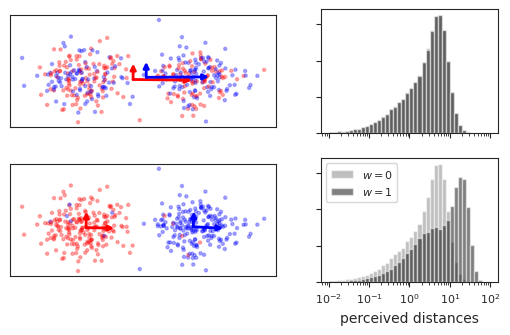

In [162]:
data1= np.random.random(size=(2,200)) * np.array([[1,0.3]]).T
data1 = np.array(list(np.random.random(size=(2, 100)).T * 0.2 + np.array([0.2, 0]) )+ list((np.random.random(size=(2,100))).T * 0.2  + np.array([0.6, 0]) )).T

data1 = np.array(list(np.random.multivariate_normal(size=200, mean=(0.15,0), cov=np.diag([0.02,0.01]))) + list(np.random.multivariate_normal(size=200, mean=[0.85, 0], cov=np.diag([0.02,0.01])))).T
data1 = data1[:, np.argsort(data1[0, :])]

#cols = [{1:"r", 2:"b"}[i] for i in ids]
#plt.scatter(data1[0,:], data1[1,:], c=cols)

def shuffle(input_list, count=2):
    '''Shuffles any n number of values in a list'''
    indices_to_shuffle = random.sample(range(len(input_list)), k=count)
    to_shuffle = [input_list[i] for i in indices_to_shuffle]
    random.shuffle(to_shuffle)
    for index, value in enumerate(to_shuffle):
        old_index = indices_to_shuffle[index]
        input_list[old_index] = value
    return input_list

fig, axs = plt.subplot_mosaic([["a", "ad"], ["b", "bd"]], gridspec_kw={"width_ratios":[1.5,1]}, figsize=(16/2.54, 9/2.54))


scale=1
parties = ["r", "b"]
for t, ax in enumerate(["a", "b"]):
    ids = list(np.ones(200))+list(np.ones(200)*2)
    if t==0: 
        ids = shuffle(ids, count=int(0.9*len(ids)))
    if t==1: 
        ids = shuffle(ids, count=int(0.05*len(ids)))
    #if t==1: 
    #    ids = shuffle(ids, count=200)
        
    cols = [{1:"r", 2:"b"}[i] for i in ids]
    df = pd.DataFrame({"x":data1[0,:], "y":data1[1,:], "identity":cols, "essround":t})
    axs[ax].scatter(data1[0,:], data1[1,:], c=cols, s=5, alpha=0.3)
    CSS_dict, Trafo = get_Trafo(df, parties=parties, waves=[t], variables=["x", "y"])
    for id in parties:
        T = CSS_dict[t][id]
        arrowprops = dict(shrinkA=0, shrinkB=0, arrowstyle="<|-", color=id,lw=2, alpha=1, edgecolor=None)       
        start = np.mean(df.loc[df.identity==id, ["x", "y"]], axis=0)
        axs[ax].annotate("", start, start+scale*T[:, 0], arrowprops=arrowprops)
        axs[ax].annotate("", start, start+scale*T[:, 1], arrowprops=arrowprops, )
    PxP_0_d2 =subjDist(df[["x", "y"]].to_numpy(), df[["x", "y"]].to_numpy(), ["None" for _ in cols], Trafo[t])
    axs[ax+"d"].hist(PxP_0_d2.flatten(), bins=np.logspace(-2,2, 41), color="grey", alpha=0.5, label=r"$w=0$")
    PxP_1_d2 =subjDist(df[["x", "y"]].to_numpy(), df[["x", "y"]].to_numpy(), cols, Trafo[t])
    axs[ax+"d"].hist(PxP_1_d2.flatten(), bins=np.logspace(-2, 2, 41), color="k", alpha=0.5, label=r"$w=1$")
    print(np.max(PxP_1_d2), np.max(PxP_0_d2))
    print(np.mean(PxP_1_d2), np.mean(PxP_0_d2))
    
    axs[ax+"d"].set_xscale("log")
    #axs[ax+"d"].set_xli#m(0.01, 3)
    
for ax in ["a", "b"]:
    axs[ax].set_aspect("equal")

axs["ad"].set_ylabel("")
axs["ad"].set_yticklabels([])
axs["bd"].set_ylabel("")
axs["bd"].set_yticklabels([])
axs["ad"].set_xticklabels([])
axs["a"].set_xticklabels([])
axs["b"].set_yticks([])
axs["b"].set_xticks([])
axs["a"].sharey(axs["b"])
axs["a"].sharex(axs["b"])

#axs["a"].sharex(axs["b"])
axs["bd"].legend(fontsize=smallfs)
axs["bd"].set_xlabel("perceived distances")